In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.io as pio
from plotly.colors import n_colors
import plotly.express as px
import plotly.figure_factory as ff



In [2]:
# import and clean data
with open('ratings.csv', 'r', encoding='mac_roman', newline='') as csvfile:
    df = pd.read_csv(csvfile)

df = df[df['Title Type'] == 'movie'].copy()
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Date Rated'] = pd.to_datetime(df['Date Rated'])
df['Diff in ratings'] = round(df['IMDb Rating'] - df['Your Rating'],1)
df['Link'] = '<a href=”' + df['URL'].astype(str) +'”>'+ df['Title'].astype(str) 


df.drop('Title Type', axis=1, inplace=True)
df.to_csv('ratings.csv', index=False)

# Genres
one_hot = df['Genres'].str.get_dummies(sep=', ')
genres = list(one_hot.sum().sort_values(ascending=False).index)[:8]
one_hot = one_hot[genres].astype(bool).copy()
df = df.join(one_hot)
df = df.drop(['Genres', 'Date Rated'], axis=1)

df['Decade'] = pd.cut(df['Year'], bins=list(range(1979, 2039, 10)), labels=[str(i+1)[2:] + "'s" for i in range(1979, 2029, 10)], include_lowest=True)

color_list = ['#1A4D94', '#007A33', '#CB4F0A', '#5A2D81'] * int(len(df)/3)
full_color_list = ['#1A4D94', '#5C7DAA', '#007A33', '#33955C', '#CB4F0A', '#F58426','#5A2D81', '#DFAEE6'] * int(len(df)/7)

alt_greys = ['#cccccc', '#e4e4e4'] * len(df)



In [3]:
# Table1
# See if links work when exporting as picture and .html file
my_ratings = pd.DataFrame()
my_ratings['My Rating'] = [i for i in range(10,0,-1)]
my_ratings['Criteria'] = ['Perfect','Great','Really good','Good','Okay','Average','Not good','Really not good','Bad','Really Bad']
my_ratings['Link'] = ['[The Dark Knight](https://www.imdb.com/title/tt0468569/)',
                        '[Inglourious Basterds](https://www.imdb.com/title/tt0361748/)',
                        '[The Wolf of Wall Street](https://www.imdb.com/title/tt0993846/)',
                        '[Ready Player One](https://www.imdb.com/title/tt1677720/)',
                        '[Limitless](https://www.imdb.com/title/tt1219289/)',
                        '[Masterminds](https://www.imdb.com/title/tt2461150/)',
                        '',
                        '[Fahrenheit 451](https://www.imdb.com/title/tt0360556/)',
                        '',
                        '[The Room](https://www.imdb.com/title/tt0368226/)'
]
my_ratings['Title'] = ['The Dark Knight',
'Inglourious Basterds',
'The Wolf of Wall Street',
'Ready Player One',
'Limitless',
'Masterminds',
'The Lobster',
'Fahrenheit 451 (2018)',
'The Room',
'Color Out Of Space'
]


fig = go.Figure(data=[go.Table(
    header=dict(values=['My Rating', 'Criteria', 'Example'],
                fill_color='#5C7DAA',
                font_color='white',
                align='left'),
    cells=dict(values=[my_ratings['My Rating'], my_ratings['Criteria'], my_ratings['Title']],
                fill_color=[alt_greys[:len(df)]]*3,
                font_color='black',
                align='left'))])

fig.update_layout(
    title=dict(
        text='How I breakdown my ratings',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    width=600,
    height=500
)

fig.show()
# plotly.offline.plot(fig, filename='3-13-20-table1.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-table1.html', auto_open=True)
# fig.write_image("3-13-20-table1.png")



In [4]:
# Scatter1
# my rating vs. imdb rating
fig = go.Figure(data=go.Scatter(x=df['IMDb Rating'],
                                y=df['Your Rating'],
                                mode='markers',
                                marker=dict(
                                    size=8,
                                    color=df['Year'],
                                    colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(0,122,51)']],
                                    showscale=True,
                                    colorbar=dict(
                                        title="Year released"
                                    ),
                                    cmin=df['Year'].min(),
                                    cmax=df['Year'].max(),
                                    cmid=df['Year'].mean()
                                ),
                                hovertemplate=df['Title'].astype(str)+' (' +df['Year'].astype(str) + ' film)'+
                                '<br><b>IMDb Rating</b>: %{x}<br>'+
                                '<b>My Rating</b>: %{y}'+'<extra></extra>'
                                ))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='IMDb Rating vs. My Rating',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='IMDb Rating',
        range=[.5,10.5],
        tickvals=[i for i in range(1,11)]
    ),
    yaxis=dict(
        title='My Rating',
        range=[.5,10.5],
        tickvals=[i for i in range(1,11)]
    ),
    width=800,
    height=800,
    shapes=[dict(type='line',
                    x0=0,
                    y0=0,
                    x1=10,
                    y1=10,
                line=dict(
                    color='black',
                    width=2
                ))],
    annotations=[
            go.layout.Annotation(
                text='Movies I liked<br>more than iMDB',
                align='center',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=.15,
                y=0.75,
                bordercolor='black',
                borderwidth=1
            ),
            go.layout.Annotation(
                text='Movies I liked<br>less than iMDB',
                align='center',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=.91,
                y=.15,
                bordercolor='black',
                borderwidth=1
            )
        ]
)

fig.show()
# plotly.offline.plot(fig, filename='3-3-20-scatter1.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-scatter1.html', auto_open=True)
# fig.write_image("3-13-20-scatter1.png")



In [5]:
# Table2
df_diff = df.sort_values(axis=0,by='Diff in ratings').reset_index(drop=True).copy()
df_diff['T_Title'] = df_diff['Title'].astype(str) + ' (' + df_diff['Year'].astype(str) + ' film)'

colors = n_colors('rgb(0,122,51)','rgb(207, 198, 0)', int(len(df_diff)/2), colortype='rgb') + n_colors('rgb(207, 198, 0)', 'rgb(0, 145, 222)', int(len(df_diff)/2), colortype='rgb')
fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Title</b>', '<b>IMDb Rating</b>', '<b>My Rating</b>', '<b>Difference in Ratings</b>'],
    align='center',font=dict(color='white', size=12),
    fill_color='#5C7DAA'
  ),
  cells=dict(
    values=[df_diff['T_Title'], df_diff['IMDb Rating'], df_diff['Your Rating'], round(df_diff['Diff in ratings'],1)],
    align='left', font=dict(color=['black', 'black', 'black', 'white'], size=11),
    fill_color=[alt_greys[:len(df_diff)],alt_greys[:len(df_diff)],alt_greys[:len(df_diff)],colors]
    ))
])

fig.update_layout(
    title=dict(
        text='IMDb Rating vs. My Rating breakdown',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    width=800,
    height=800)

fig.show()
# plotly.offline.plot(fig, filename='3-13-20-table2.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-table2.html', auto_open=True)
# fig.write_image("3-13-20-table2.png")



In [6]:
# Scatter2
# year vs diff in ratings
# toggle by genres (buttons)
fig = go.Figure(data=go.Scatter(x=df['Year'],
                    y=df['Diff in ratings'],
                    mode='markers',
                    # marker_color=df['Runtime (mins)'],
                    marker=dict(
                        size=8,
                        color=df['Your Rating'],
                        colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(26,77,148)']],
                        showscale=True,
                        colorbar=dict(
                            title="My rating"
                        ),
                        cmin=df['Your Rating'].min(),
                        cmax=df['Your Rating'].max(),
                        cmid=df['Your Rating'].mean()
                    ),
                    hovertemplate=df['Title'].astype(str)+' (' +df['Year'].astype(str) + ' film)'+
                    '<br><b>IMDb Rating</b>: '+df['IMDb Rating'].astype(str)+'<br>'+
                    '<b>My Rating</b>: '+df['Your Rating'].astype(str)+'<br>'+
                    '<b>Difference</b>: %{y}'+'<extra></extra>'
                ))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='Year vs. Difference in Ratings',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='Year',
        range=[df['Year'].min() - 1, df['Year'].max() + 1]
    ),
    yaxis=dict(
        title='Difference in Ratings',
        range=[math.ceil(df['Diff in ratings'].max()), math.floor(df['Diff in ratings'].min())],
        tickvals=[i for i in range(math.floor(df['Diff in ratings'].min()),
                                    math.ceil(df['Diff in ratings'].max()))]
    ),
    width=800,
    height=800,
    shapes=[dict(type='line',
                    x0=0,
                    y0=0,
                    x1=df['Year'].max(),
                    y1=0,
                    line=dict(
                        color='black',
                        width=2
                    ))],
    annotations=[
            go.layout.Annotation(
                text='Movies I liked<br>more than iMDB',
                align='center',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=.15,
                y=.85,
                bordercolor='black',
                borderwidth=1
            ),
            go.layout.Annotation(
                text='Movies I liked<br>less than iMDB',
                align='center',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=.15,
                y=.185,
                bordercolor='black',
                borderwidth=1
            )
        ]
)
fig.show()
# plotly.offline.plot(fig, filename='3-13-20-scatter2.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-scatter2.html', auto_open=True)
# fig.write_image("3-13-20-scatter2.png")



In [7]:
# bar1
# num movies per year
bar = df.groupby('Year').count()['Title'].copy()
fig = go.Figure(data=go.Bar(x=bar.index,
                    y=bar.values,
                    marker_color=full_color_list[0:len(bar)],
                    hovertemplate='Year: ' + bar.index.astype(str) + ''+
                    '<br>Count: '+ bar.values.astype(str) +'<br>'
                    + '<extra></extra>'
                ))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='Number of movies in my ratings by year released',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Number of movies rated'
    ),
    width=900,
    height=600
)
fig.show()
# plotly.offline.plot(fig, filename='3-13-20-bar1.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-bar1.html', auto_open=True)
# fig.write_image("3-13-20-bar1.png")



In [8]:
# Table3
# top 5 genres by decade

# fig.update_layout(
#     title=dict(
#         text='How I breakdown my ratings',
#         font=dict(
#             size=24,
#             color='#000000'
#         ),
#         x=.5
#     ))



In [9]:
# plotly box/whisker1
# x is decade y is my rating

df.sort_values('Year', inplace=True)
fig = go.Figure(data=go.Box(x=df['Decade'],
                    y=df['Your Rating'],
                    marker=dict( 
                        color='#000000'
                    ),
                    line=dict(color='#CB4F0A')
                ))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='My ratings by decade',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='Decade'
    ),
    yaxis=dict(
        title='My Rating'
    ),
    width=900,
    height=600
)
fig.show()
# plotly.offline.plot(fig, filename='3-13-20-boxandwhisker1.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-boxandwhisker1.html', auto_open=True)
# fig.write_image("3-13-20-boxandwhisker1.png")



In [10]:
# plotly box/whisker2
# x is genre y is my rating
# change hovertext
# Add mean

fig = go.Figure()
for i in range(len(genres)):
    fig.add_trace(go.Box(
        y=df[df[genres[i]] == True]['Your Rating'],
        name=genres[i]
    ))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='My ratings by genre',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='Genre'
    ),
    yaxis=dict(
        title='My Rating'
    ),
    width=900,
    height=600
)
fig.show()
# plotly.offline.plot(fig, filename='3-13-20-boxandwhisker2.html')
# Originally run with 'https://github.com/ethanfuerst/imdb_ratings/blob/226cfa35e9f54639c2e5a042ac60bea2a2ffc0f7/ratings.csv'
# pio.write_html(fig, file='3-3-20-boxandwhisker2.html', auto_open=True)
# fig.write_image("3-13-20-boxandwhisker2.png")



In [11]:
# This is confusing. Brainstorm this
# df[(df['Decade'] == "90's") & (df['Sci-Fi'] == True)]
# df[(df['Decade'] == "90's") & (df['Sci-Fi'] == False)]
df_2 = df.groupby(['Decade','Sci-Fi'], as_index=False).mean()[['Decade','Sci-Fi','IMDb Rating', 'Your Rating']]
df_2['Sci-Fi'] = np.where(df_2['Sci-Fi'], 'Sci-Fi', 'not Sci-Fi')
df_2['combo'] = df_2['Decade'].astype(str) + ' ' + df_2['Sci-Fi'].astype(str)
df_2.sort_values(['Decade','Sci-Fi'], inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_2['combo'], 
    y=df_2['IMDb Rating'],
    name='IMDb Rating',
    mode='markers'
))
fig.add_trace(go.Scatter(
    x=df_2['combo'], 
    y=df_2['Your Rating'],
    name='My Rating',
    mode='markers'
))
fig.update_layout(
    plot_bgcolor='#cccccc',
    title=dict(
        text='My sci-fi ratings by decade',
        font=dict(
            size=24,
            color='#000000'
        ),
        x=.5
    ),
    xaxis=dict(
        title='Decade and Genre'
    ),
    yaxis=dict(
        title='Average Rating'
    )
)
fig.show()



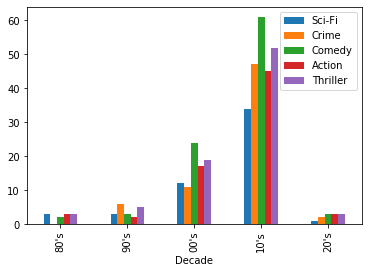

In [12]:
# Change to plt bar
df.groupby('Decade').sum()[['Sci-Fi', 'Crime', 'Comedy', 'Action', 'Thriller']].plot(kind='bar')
# eh idk
# Maybe do averages? or box plot

